# <span style="color:red"> Lezione 10 </span>
## <span style="color:green"> Esercizio 10.1 </span>

Ho riutilizzato il codice della lezione precedente per minimizzare il percorso tra le varie capitali americane, prima utilizzando un singolo processo parallelo poi usandone 10.
Per scambiare informazioni tra i vari processi, ho scritto un algoritmo che alla 50esima generazione fa scambiare casualmente i migliori 10 percorsi del primo processo con quelli degli altri processi. 
Questo scambio avviene prima ordinando per fitness i 10 percorsi scambiati e i 100 già presenti nel processo dal primo (fitness minore) all'ultimo (fitness più alta). Ricordiamo che in questo caso la fitness è la lunghezza del precorso, quindi va minimizzata. Di questi 110 ne verranno conservati 100 prendendo per 100 volte il precorso in posizione $i$, con
$$i = \lfloor 110 \cdot \mathcal{U}(0,1)^5 \rfloor +1 .$$

Poi, alla 51esima generazione sarà il secondo processo a compiere questa operazione con tutti gli altri, e così via fino ad arrivare al decimo.
Questo scambio è ripetuto ogni 50 generazioni.

## <span style="color:green"> Esercizio 10.2 </span>

Adesso vediamo i risultati ottenuti utilizzando un solo processo, quindi usando un algoritmo identico a quello della lezione precedente.


In [33]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from astropy.table import Table

def FitnessGraph (filename,maxzoom=0) :

    Names1 = np.array(["NGen","BestFitness","BestAvFitness"])
    datas = Table.read(filename,format="ascii",names=Names1)

    n_gen=np.array(datas["NGen"])
    best_fitness=np.array(datas["BestFitness"])
    best_avfitness=np.array(datas["BestAvFitness"])

    plt.plot(n_gen,best_avfitness)
    plt.title("Mean Fitness for generation")
    if maxzoom !=0 : plt.xlim(0,maxzoom)
    #plt.plot(n_gen,best_fitness,color="r")
    plt.show()
    
    return len(n_gen)

def FitnessGraphs (filename,filename2,filename3,filename4,filename5,maxzoom=0) :

    Names1 = np.array(["NGen","BestFitness","BestAvFitness"])
    datas = Table.read(filename,format="ascii",names=Names1)

    n_gen=np.array(datas["NGen"])
    best_fitness=np.array(datas["BestFitness"])
    best_avfitness=np.array(datas["BestAvFitness"])

    plt.plot(n_gen,best_avfitness,label="Simulation with 1 process")
    plt.title("Mean Fitness for generation")
    if maxzoom !=0 : plt.xlim(0,maxzoom)
    
    datas = Table.read(filename2,format="ascii",names=Names1)
    n_gen=np.array(datas["NGen"])
    best_fitness=np.array(datas["BestFitness"])
    best_avfitness=np.array(datas["BestAvFitness"])
    plt.plot(n_gen,best_avfitness,label="Simulation with 10 processes, process #1")
    
    datas = Table.read(filename3,format="ascii",names=Names1)
    n_gen=np.array(datas["NGen"])
    best_fitness=np.array(datas["BestFitness"])
    best_avfitness=np.array(datas["BestAvFitness"])
    plt.plot(n_gen,best_avfitness,label="Simulation with 10 processes, process #2")
    
    datas = Table.read(filename4,format="ascii",names=Names1)
    n_gen=np.array(datas["NGen"])
    best_fitness=np.array(datas["BestFitness"])
    best_avfitness=np.array(datas["BestAvFitness"])
    plt.plot(n_gen,best_avfitness,label="Simulation with 10 processes, process #3")
    
    datas = Table.read(filename5,format="ascii",names=Names1)
    n_gen=np.array(datas["NGen"])
    best_fitness=np.array(datas["BestFitness"])
    best_avfitness=np.array(datas["BestAvFitness"])
    plt.plot(n_gen,best_avfitness,label="Simulation with 10 processes, process #4")
    #plt.plot(n_gen,best_fitness,color="r")
    plt.legend()
    plt.show()
    
    return len(n_gen)

def read(filename) :
    file = open(filename,"r")
    values = []

    for line in file:
        line = line.strip()
        lines = line.split()
        values.append(np.array([float(lines[0]),float(lines[1])]))
        
    file.close()

    return values

def readchromosomes(filename) :
    file = open(filename,"r")
    values = []
    i=0
    for line in file:
        ins_values=[]
        line = line.strip()
        lines = line.split()
        for j in range (1,51):
            ins_values.append(int(lines[j]))
        values.append(np.array(ins_values))
        i=i+1
        
    file.close()

    return values

def MakePath(filestops,filechromosomes,graphname,NGen) :
    positions=read(filestops)
    positions=np.array(positions)
    x_pos = readchromosomes(filechromosomes)
    x_pos = np.array(x_pos)

    x_sol=np.array(x_pos[NGen])-1
    #print(x_sol)
    N=len(positions)

    fig, ax = plt.subplots(1, sharex=True, sharey=True)         
    ax.set_title(graphname)
    ax.scatter(positions[:, 0], positions[:, 1])             

    for i in range(N-1):
        start_node = x_sol[i]
        start_pos = positions[start_node]
        next_node = x_sol[i+1] 
        end_pos = positions[next_node]
        ax.annotate("",
                xy=start_pos, xycoords='data',
                xytext=end_pos, textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3"))
    start_node = x_sol[N-1]
    next_node = x_sol[0]
    start_pos = positions[start_node]
    end_pos = positions[next_node]
    ax.annotate("",
                xy=start_pos, xycoords='data',
                xytext=end_pos, textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3"))
    
    plt.show()
    return

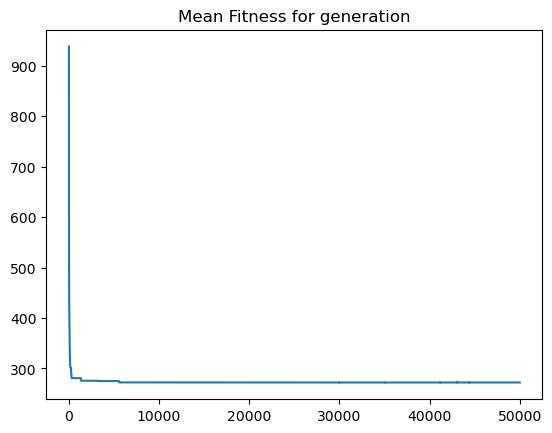

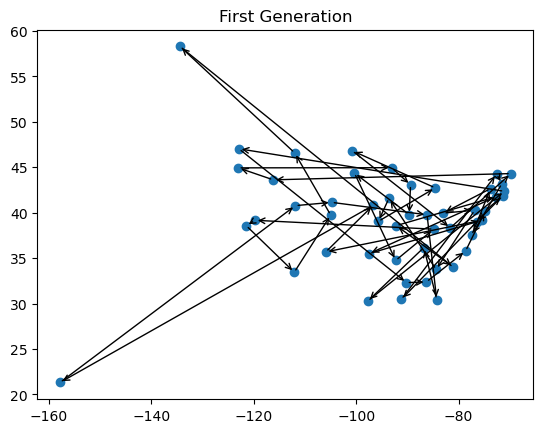

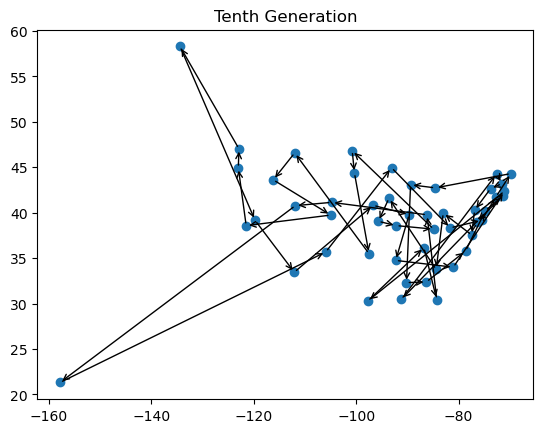

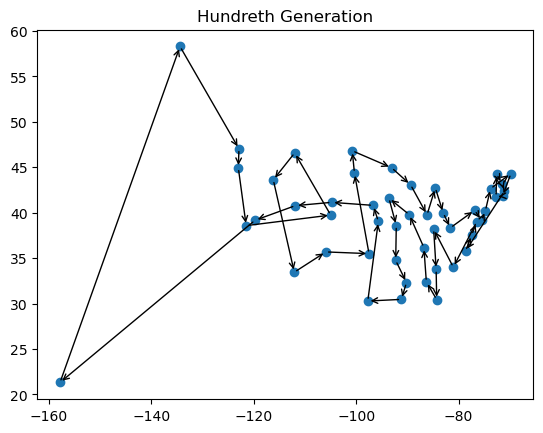

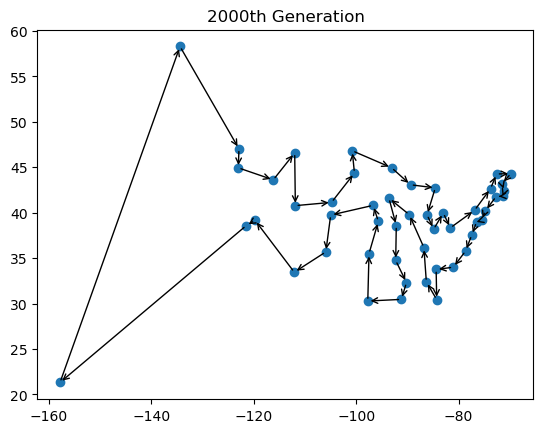

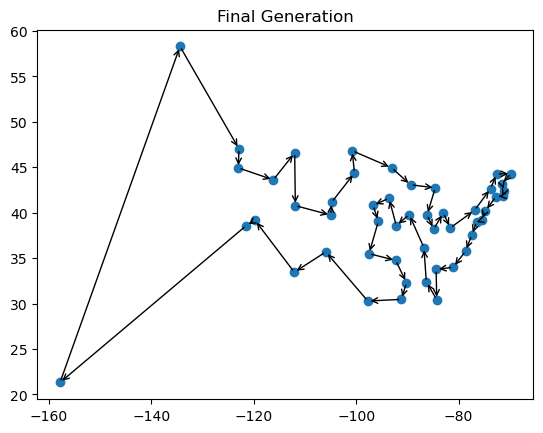

In [34]:
n=FitnessGraph("Fitness.txt")
MakePath("Stops.txt","Chromosomes.txt","First Generation",0)
MakePath("Stops.txt","Chromosomes.txt","Tenth Generation",10)
#MakePath("Stops.txt","Chromosomes.txt","Fiftieth Generation",50)
MakePath("Stops.txt","Chromosomes.txt","Hundreth Generation",100)
MakePath("Stops.txt","Chromosomes.txt","2000th Generation",2000)
#MakePath("Stops.txt","Chromosomes.txt","4000th Generation",4000)
MakePath("Stops.txt","Chromosomes.txt","Final Generation",n-1)

Si può notare che ho ottenuto una buona convergenza in $5 \cdot 10^4$ generazioni. Risulta difficile stabilire se questo sia effettivemente un minimo, ma giudicando dalla figura dell'ultima generazione sicuramente non è lontano dal minimo. 
Ho notato durante l'esecuzione di varie prove che una delle difficoltà principali è data dallo stabilire l'ordine corretto delle capitali del New England, essendo molto vicine e quindi dando poca differenza di fitness tra possibili modifiche del loro ordine.

Sotto sono riportati i risultati di questa simulazione, fatta con un solo processo, con quelli di una simulazione fatta con 10 processi.

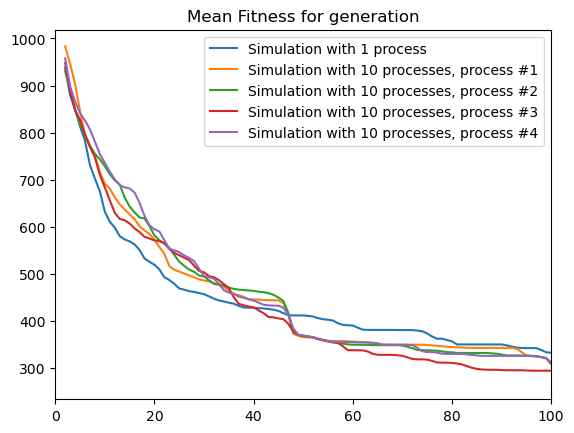

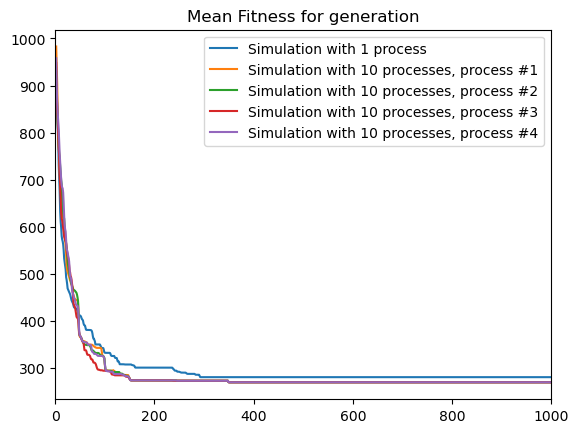

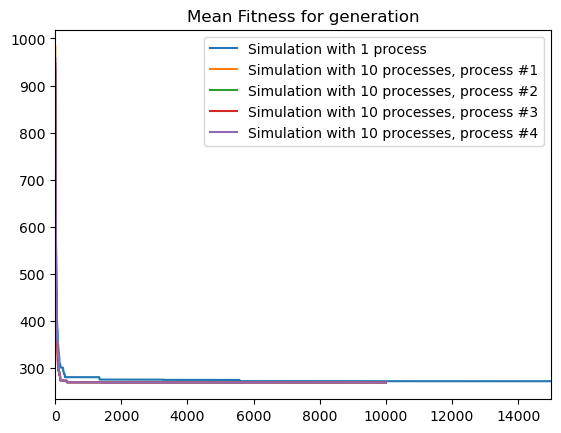

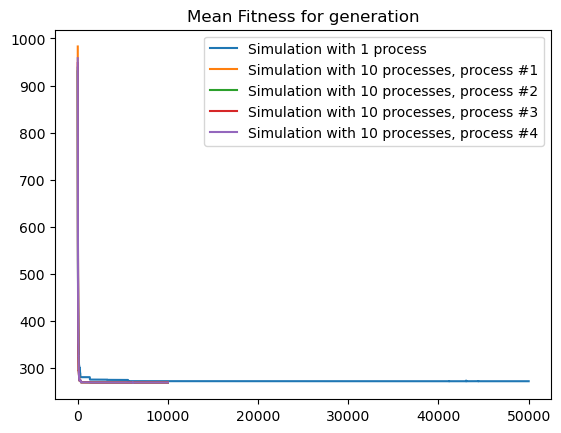

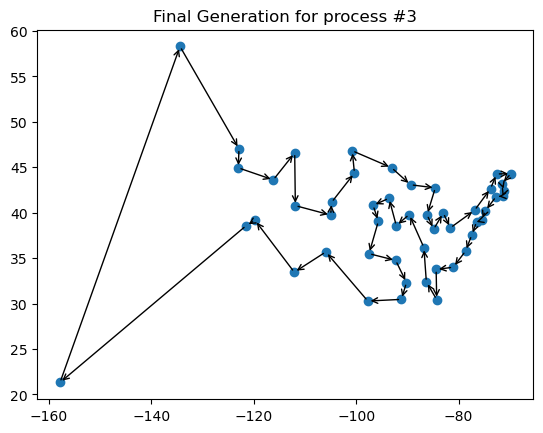

In [35]:
FitnessGraphs("Fitness.txt","MPIFitness_0.txt","MPIFitness_1.txt","MPIFitness_2.txt","MPIFitness_3.txt",100)
FitnessGraphs("Fitness.txt","MPIFitness_0.txt","MPIFitness_1.txt","MPIFitness_2.txt","MPIFitness_3.txt",1000)
n=FitnessGraphs("Fitness.txt","MPIFitness_0.txt","MPIFitness_1.txt","MPIFitness_2.txt","MPIFitness_3.txt",15000)
FitnessGraphs("Fitness.txt","MPIFitness_0.txt","MPIFitness_1.txt","MPIFitness_2.txt","MPIFitness_3.txt")
MakePath("Stops.txt","Chromosomes.txt","Final Generation for process #3",n-1)

Usando 10 processi, non si nota nessuna differenza nelle prime 50 generazioni, poichè i primi scambi avvengono a partire dalla 51esima. Con gli scambi, si nota che la fitness rimane decisamente più bassa nella simulazione a 10 processi fino alla generazione 300. A quel punto tutte e due le simulazioni sono molto vicine al minimo, e solo alcune piccole mutazioni casuali possono minimizzare ulteriormente, ma risultano poco visibili sul grafico.

Comunque, si osserva che la simulazione a 10 processi in $10^4$ generazioni per processo ha ottenuto un risultato migliore (anche se di molto poco), e quindi il miglioramento dato dal calcolo parallelo è stato significativo.